In [3]:

from scipy import io
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly
import plotly.io as pio
import pickle
import scipy.io
import matplotlib.pyplot as plt

# import matplotlib.pyplot as plt

pio.renderers.default = "browser"
exp = '2022_01_31'
drive_path = f'I:/My Drive/{exp}'
path = f'{drive_path}'
mov = 15
frame = 210

def load_camera(cam,path): # add to utilities
  camera_txt = np.genfromtxt(f'{path}/camera/camera{cam}_KRT.txt', delimiter=",")
  camera_data = {'K':camera_txt[0:3],'R':camera_txt[3:6],'T':camera_txt[6:7]}
  return camera_data


# load 2d data to dictionary
image_data = {f'cam{cam}' : np.hstack((scipy.io.loadmat(f'{path}/2d_data/location_cam{cam}_mov{mov}.mat')['m'],scipy.io.loadmat(f'{path}/2d_data/value_cam{cam}_mov{mov}.mat')['m'])) for cam in [1,2,3,4]}

# load camera to camera dictionary
camera_data = {f'cam{cam}':load_camera(cam,path) for cam in [1,2,3,4]}




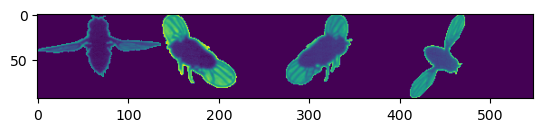

In [63]:
import matplotlib.pyplot as plt



def get_frame(frame,max_size,image_size = [800,1280],dx_crop = 1,dy_crop = 1):

  image = np.zeros((image_size))
  image[frame[:,0],frame[:,1]] = frame[:,3]
  croped_frame = image[np.min(frame[:,0]) - dx_crop:np.min(frame[:,0]) + max_size[0],np.min(frame[:,1]) - dy_crop:np.min(frame[:,1]) + max_size[1]]
  return croped_frame

def crop_pixel_size(frame_all_cameras):
    crop_pixels = np.vstack([[np.min(camera_image[:,0]),np.max(camera_image[:,0]),np.min(camera_image[:,1]),np.max(camera_image[:,1])] for camera_image in frame_all_cameras])
    crop_size = np.max(crop_pixels[:,1::2] - crop_pixels[:,::2],axis = 0) + 1
    return crop_pixels,crop_size

frame_num = 210



frame_all_cameras = [image_data[f'cam{cam}'][image_data[f'cam{cam}'][:,2] == frame_num,:] for cam in [1,2,3,4]]
crop_pixels,crop_size = crop_pixel_size(frame_all_cameras)
croped_frame = [get_frame(frame,crop_size,image_size = [800,1280],dx_crop = 1,dy_crop = 1) for frame in frame_all_cameras]

plt.imshow(np.hstack(croped_frame))
